## Imports

In [2]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sn
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from explore_hyperparameter import *
import math
from plot_learning_curve import *
import time

import warnings
warnings.filterwarnings('ignore')


RANDOM_STATE = 4000 #to keep results consistent


## Load Data

In [3]:
data = pd.read_csv('letter-recognition.data')
X = data.values[:, 1:17]
y = data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = RANDOM_STATE)



## NEW ANALYSIS


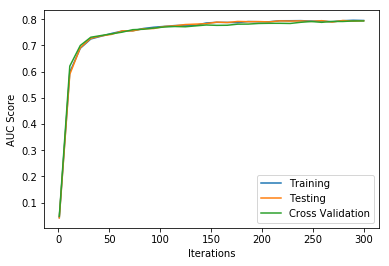

In [3]:
param = np.linspace(1, 300, 30, endpoint=True)
clf = [MLPClassifier(max_iter=int(i), random_state=RANDOM_STATE, hidden_layer_sizes = (16)) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Iterations')

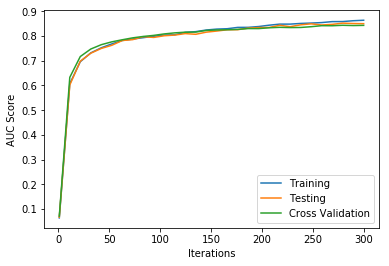

In [4]:
param = np.linspace(1, 300, 30, endpoint=True)
clf = [MLPClassifier(max_iter=int(i), random_state=RANDOM_STATE, hidden_layer_sizes = (16, 16)) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Iterations')

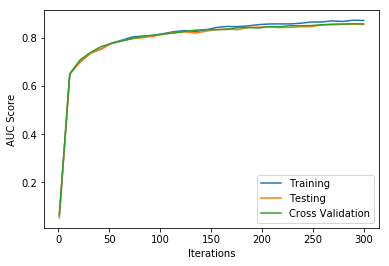

In [5]:
param = np.linspace(1, 300, 30, endpoint=True)
clf = [MLPClassifier(max_iter=int(i), random_state=RANDOM_STATE, hidden_layer_sizes = (16, 16, 16)) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, param, 'Iterations')

### messing with learning rate

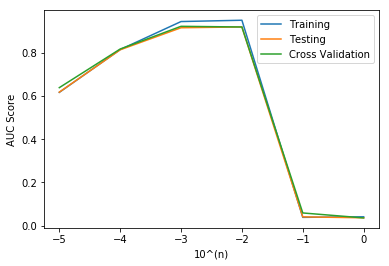

In [6]:
powers = [-5, -4, -3, -2, -1, 0]
param = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
clf = [MLPClassifier(random_state=RANDOM_STATE,learning_rate_init=i) for i in param]
explore_hyperparameter(X, y, X_train, y_train, X_test, y_test, clf, powers, '10^(n)')

100.32032489776611


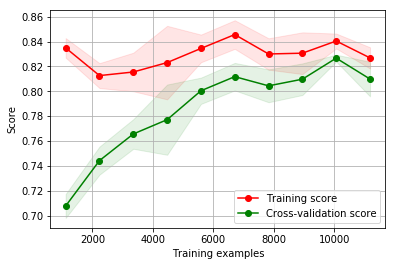

In [4]:
start = time.time()
clf = MLPClassifier(random_state=RANDOM_STATE, learning_rate_init=0.01, hidden_layer_sizes = (16, 16), max_iter=300)
clf.fit(X_train, y_train)
plot_learning_curve(clf, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
print(time.time() - start)